In [1]:
import pandas as pd
advert=pd.read_csv('E:/ml/dataset/5/Advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Sales~TV',data=advert).fit()
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [4]:
model1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [5]:
model1.rsquared

0.61187505085007099

In [6]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 19 Jun 2017   Prob (F-statistic):           1.47e-42
Time:                        02:27:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
sales_pred=model1.predict(pd.DataFrame(advert['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

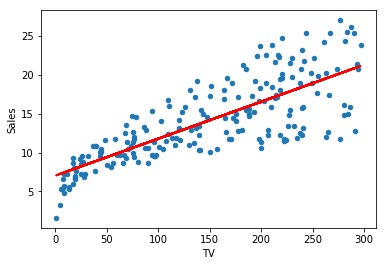

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
advert.plot(kind='scatter', x='TV', y='Sales')
plt.plot(pd.DataFrame(advert['TV']),sales_pred,c='red',linewidth=2)

In [10]:
#Calculating RSE, Salesmean, Error
advert['RSE']=(advert['Sales']-advert['sales_pred'])**2
RSEd=advert.sum()['RSE']
RSE=np.sqrt(RSEd/198)
salesmean=np.mean(advert['Sales'])
error=RSE/salesmean
RSE,salesmean,error

KeyError: 'sales_pred'